## Imports

In [1]:
import sys
sys.path.append('..')

import numpy as np
from champ import Field
from pupille import Pupil
from polarizer import Polarizer
from separateur import Separator
from mirror import Mirror
from detecteur import Detector
from slm import SLM
from propagator import Propagator
from masque import Pyramid, Tilt, TipTiltMirror

## Define all properties

In [2]:
# DEFINE FIELD'S SIZE
n = 256

# CREATE FIELD
#f = Field(n, field_map='gaussian', gaussian_variance=2)
f = Field(n, field_map='plan_wave', incidence_angles=[-np.pi/(n),
                                                      -np.pi/(n)])

# DEFINE THE PROPAGATORS
FFT = Propagator('FFT', f)
IFFT = Propagator('IFFT', f)

# CREATE THE ENTRANCE PUPIL
P = Pupil(n, aperture_shape='circular')

# CREATED TIP-TILT MASK TO MODULATE ON THE SLM TOP
mod = TipTiltMirror(n)


# CREATE THE TWO OCAM DETECTORS
Cam = Detector(n, camera_name='Thorlabs Cam')

## Propagate

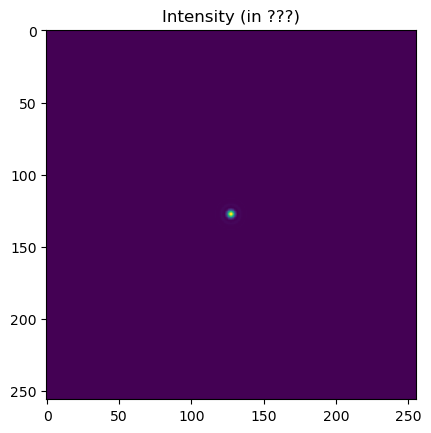

In [3]:
# LIGHT PROPAGATION FROM INFINITE SOURCE -> PUPIL
# -> MODULATION MIRROR -> CAMERA
f * P * mod * FFT * Cam

## Create modulation

/Users/pjanin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


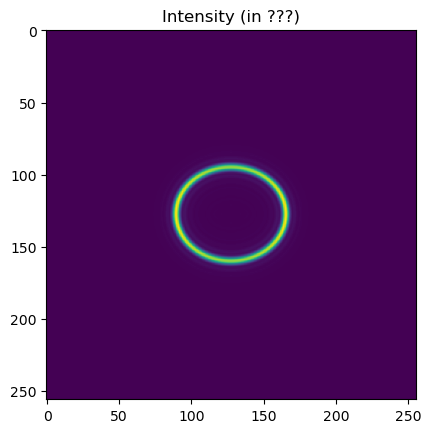

In [4]:
# ROTATION
theta = np.sqrt(2)/2

# AMPLITUDE
amp = 100

# PHASE
phi = 0

# CREATE THE MODULATION VECTORS
x_mod = amp * np.cos(theta) * np.cos(
        np.linspace(2*np.pi/200,
                    2*np.pi, 200) + phi)
y_mod = amp * np.sin(theta) * np.sin(
        np.linspace(2*np.pi/200,
                    2*np.pi, 200))

# CHANGE THE MODULATION
mod.angles = [x_mod, y_mod]
# ACTUALIZE THE FIELD
+f